In [1]:
# INST414 Module 2: Social Media & Mental Health
import networkx as nx
import requests
import json
import matplotlib.pyplot as plt

In [2]:
# ✅ Step 1: Fetch Data from CDC API
url = "https://data.cdc.gov/api/views/jf8m-mtc3/rows.json?accessType=DOWNLOAD"
response = requests.get(url)
data = response.json()

# ✅ Step 2: Extract relevant information
rows = data["data"]  # The actual data rows

# Debug: Print first row structure
print(f"First row: {rows[0]}")  # Check the format

First row: ['row-ib2p~pb92_qwvc', '00000000-0000-0000-D5E9-98425268DEC6', 0, 1556065528, None, 1556065528, None, '{ }', 'ALASKA', '2019', '1', None, '-', '1', None, None, '-', None, '-', None, '-', '0', None, None, '-', None, '-', None, '-', '0', None, None, '-', None, '-', ['{"address": "", "city": "", "state": "ALASKA", "zip": ""}', '63.631126', '-151.631889', None, False], None, '20190158']


In [3]:
edges = []
for row in rows:
    try:
        source = row[8]  # Example index, adjust based on the dataset
        target = row[9]  # Example index, adjust based on the dataset
        weight = 1  # Default weight (change if there's a relevant numeric field)
        
        edges.append((source, target, weight))
    except IndexError:
        continue  # Skip rows with missing data


In [4]:
G = nx.Graph()
G.add_weighted_edges_from(edges)

# ✅ Step 4: Graph Analysis - Degree Centrality
centrality = nx.degree_centrality(G)
print("Node Centrality:", centrality)

Node Centrality: {'ALASKA': 0.014285714285714285, '2019': 1.0, 'PENNSYLVANIA': 0.014285714285714285, 'WEST SOUTH CENTRAL': 0.014285714285714285, 'INDIANA': 0.014285714285714285, 'AMERICAN SAMOA': 0.014285714285714285, 'TOTAL': 0.014285714285714285, 'VERMONT': 0.014285714285714285, 'SOUTH DAKOTA': 0.014285714285714285, 'WEST NORTH CENTRAL': 0.014285714285714285, 'OKLAHOMA': 0.014285714285714285, 'COLORADO': 0.014285714285714285, 'HAWAII': 0.014285714285714285, 'NORTH CAROLINA': 0.014285714285714285, 'ILLINOIS': 0.014285714285714285, 'NEW YORK CITY': 0.014285714285714285, 'WASHINGTON': 0.014285714285714285, 'MINNESOTA': 0.014285714285714285, 'EAST NORTH CENTRAL': 0.014285714285714285, 'NEW MEXICO': 0.014285714285714285, 'KANSAS': 0.014285714285714285, 'SOUTH ATLANTIC': 0.014285714285714285, 'EAST SOUTH CENTRAL': 0.014285714285714285, 'FLORIDA': 0.014285714285714285, 'TEXAS': 0.014285714285714285, 'IDAHO': 0.014285714285714285, 'WYOMING': 0.014285714285714285, 'NEW HAMPSHIRE': 0.014285714

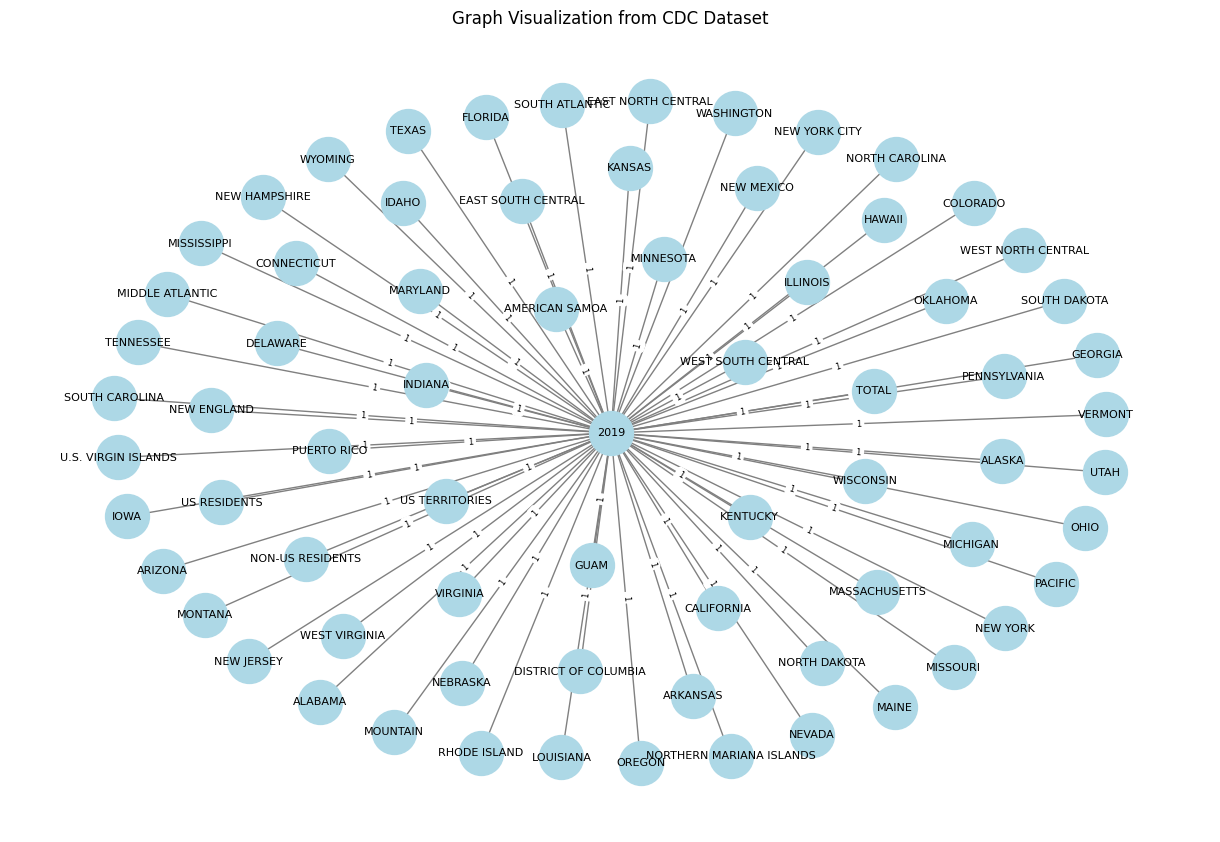

In [6]:
# ✅ Step 5: Graph Visualization
plt.figure(figsize=(12,8))  # Bigger figure
pos = nx.kamada_kawai_layout(G) 
#pos = nx.spring_layout(G, seed=42)  # Layout for better spacing
nx.draw(G, pos, with_labels=True, node_color="lightblue", edge_color="gray", node_size=1000, font_size=8)

# Add Edge Labels
edge_labels = {(e[0], e[1]): e[2] for e in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6)

plt.title("Graph Visualization from CDC Dataset")
plt.show()